In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Computation from T=13 to T=33

In [2]:
Temperature = np.array([12.997,13.203,13.404,13.604,13.804,14.004,14.204,14.404,14.604,14.803,15.004,15.204,15.404,15.604,15.804,16.005,16.205,16.405,16.604,16.803,17.005,17.204,17.403,17.604,17.804,18.004,18.204,18.404,18.604,18.805,19.004,19.204,19.405,19.604,19.804,20.004,20.205,20.404,20.604,20.804,21.004,21.205,21.404,21.604,21.803,22.004,22.204,22.403,22.604,22.803,23.003,23.204,23.404,23.604,23.805,24.005,24.204,24.404,24.604,24.804,25.004,25.203,25.404,25.604,25.804,26.004,26.203,26.404,26.604,26.805,27.004,27.204,27.405,27.603,27.804,28.005,28.204,28.404,28.604,28.805,29.004,29.205,29.404,29.604,29.804,30.004,30.205,30.404,30.605,30.804,31.004,31.204,31.404,31.605,31.804,32.004,32.204,32.404,32.604,32.803,33.005,33.204,33.405,33.604,33.804,34.005,34.204,34.404,34.604,34.804,35.004])
Mix_density = np.array([0.999583,0.999560,0.999534,0.999508,0.999479,0.999451,0.999425,0.999394,0.999368,0.999336,0.999307,0.999275,0.999245,0.999212,0.999180,0.999149,0.999115,0.999081,0.999046,0.999012,0.998978,0.998942,0.998906,0.998870,0.998833,0.998796,0.998758,0.998720,0.998682,0.998643,0.998602,0.998564,0.998523,0.998482,0.998440,0.998399,0.998359,0.998315,0.998272,0.998229,0.998185,0.998141,0.998096,0.998052,0.998006,0.997960,0.997914,0.997866,0.997819,0.997772,0.997723,0.997672,0.997613,0.997539,0.997469,0.997417,0.997366,0.997314,0.997263,0.997210,0.997158,0.997106,0.997054,0.997000,0.996947,0.996893,0.996839,0.996784,0.996730,0.996674,0.996619,0.996563,0.996518,0.996451,0.996393,0.996347,0.996279,0.996221,0.996174,0.996104,0.996044,0.995986,0.995927,0.995866,0.995806,0.995758,0.995686,0.995625,0.995562,0.995501,0.995437,0.995374,0.995312,0.995250,0.995185,0.995121,0.995057,0.994992,0.994928,0.994863,0.994798,0.994731,0.994677,0.994598,0.994530,0.994463,0.994409,0.994329,0.994261,0.994204,0.994124])

a = np.array([9.9983952*10**2,1.6952577*10,-7.9905127*10**(-3),-4.6241757*10**(-5),1.584601*10**(-7),-2.8103006*10**(-10)])/1000
b = 1.6887236*10**(-2)

water_density = 0
for i in range(0, 5):
    water_density += a[i]*Temperature**i/(1+b*Temperature)
    
wL = 0.003/(1.003)
Spec_vol_sample = 1/Mix_density

Spec_vol_water = 1/water_density

Spec_vol = (Spec_vol_sample - (1 - wL) * Spec_vol_water)/wL

In [3]:
# Let us compute dV/dT using forward finite differences to compute alpha

alpha = np.empty(len(Temperature))

for i in range(0,len(alpha)-1):
    alpha[i] = ((Spec_vol[i+1]-Spec_vol[i])/(Temperature[i+1]-Temperature[i]))/Spec_vol[i]

In [4]:
'''
To get a sense of how the points evolve, let us observe how their differences evolve

for i in range(0, len(Temperature)):
    if Temperature[i] == 23.204:
        print(i)
        
    elif Temperature[i] == 25.004:
        print(i)
for j in range(51, 60):
    print("Iteration " + str(j) + ": " + str(Spec_vol[j+1]-Spec_vol[j]))
    
We see that at 52 and 53, there is a jump in their differences: that point corresponds to the transition.
We will make a range of the points before 51 to make a polyfit. Similarly, we take the points 
'''

'\nTo get a sense of how the points evolve, let us observe how their differences evolve\n\nfor i in range(0, len(Temperature)):\n    if Temperature[i] == 23.204:\n        print(i)\n        \n    elif Temperature[i] == 25.004:\n        print(i)\nfor j in range(51, 60):\n    print("Iteration " + str(j) + ": " + str(Spec_vol[j+1]-Spec_vol[j]))\n    \nWe see that at 52 and 53, there is a jump in their differences: that point corresponds to the transition.\nWe will make a range of the points before 51 to make a polyfit. Similarly, we take the points \n'

In [4]:
onset = 51
offset = 55

# Down
Temperature_down = Temperature[:onset]

c1 = np.polyfit(Temperature_down, Spec_vol[:onset], 1)
Spec_down = Temperature_down * c1[0] + c1[1]

#Mid
Temperature_mid = Temperature[onset:offset]

c2 = np.polyfit(Temperature_mid, Spec_vol[onset:offset], 1)
Spec_mid = Temperature_mid * c2[0] + c2[1]

#Up
Temperature_up = Temperature[offset:]

c3 = np.polyfit(Temperature_up, Spec_vol[offset:], 1)
Spec_up = Temperature_up * c3[0] + c3[1]

In [5]:
a1 = c1[0]
a2 = c2[0]
a3 = c3[0]

b1 = c1[1]
b2 = c2[1]
b3 = c3[1]

T_onset = (b2 - b1)/(a1 - a2)
T_offset = (b3 - b2)/(a2 - a3)
T_m = np.mean([T_offset,T_onset])

v_onset = a1/(a1-a2)*(b2-b1)+b1
v_offset = a2/(a2-a3)*(b3-b2)+b2
v_mean = np.mean([v_onset,v_offset])

In [6]:
# Melting temperature
T_m

23.512112024083997

In [7]:
M = 734
Na = 6.02214076*10**(23)

vm = Spec_vol*M/Na*10**(24)
vm_gel = np.mean(Spec_vol[:onset]*M/Na*10**(24))
vm_fluide = np.mean(Spec_vol[offset:]*M/Na*10**(24))
vm_gel

1140.703938704968

In [8]:
vm_fluide

1193.806168122055

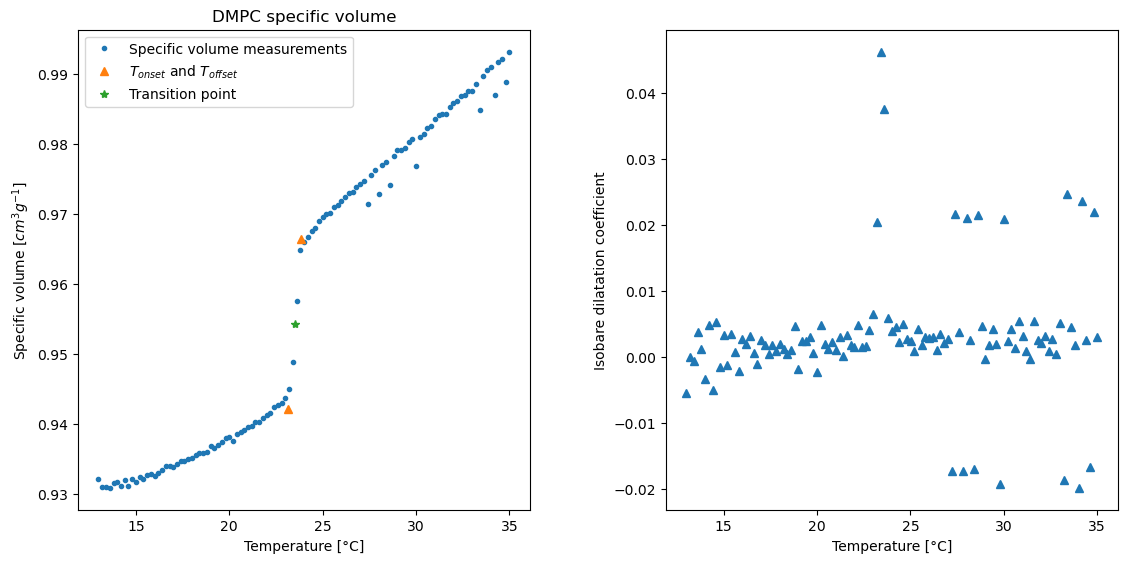

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6))

ax[0].plot(Temperature, Spec_vol,'.',label='Specific volume measurements')
#ax[0].plot(Temperature_down, Spec_down,'--',label='Linear regression of pre-transition points')
#ax[0].plot(Temperature_mid, Spec_mid,'--',label='Linear regression of transition points')
#ax[0].plot(Temperature_up, Spec_up,'--',label='Linear regression of post-transition points')
ax[0].plot([T_onset,T_offset],[v_onset,v_offset],'^',label='$T_{onset}$ and $T_{offset}$')
ax[0].plot(T_m,v_mean,'*',label='Transition point')
ax[0].legend()

ax[1].plot(Temperature,alpha,'^')

ax[0].set_xlabel('Temperature [°C]')
ax[1].set_xlabel('Temperature [°C]')
ax[0].set_ylabel('Specific volume [$cm^3g^{-1}$]')
ax[1].set_ylabel('Isobare dilatation coefficient')
ax[0].set_title('DMPC specific volume')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

In [ ]:
#np.polyfit(Temperature, np.log(Spec_vol), 1)

# Computation from T=33 to T=13

In [10]:
Mix_density = np.array([0.994123,0.994193,0.994260,0.994328,0.994397,0.994464,0.994525,0.994598,0.994665,0.994731,0.994797,0.994864,0.994928,0.994993,0.995058,0.995122,0.995185,0.995249,0.995312,0.995375,0.995438,0.995501,0.995561,0.995625,0.995684,0.995746,0.995806,0.995866,0.995926,0.995986,0.996046,0.996104,0.996163,0.996221,0.996279,0.996337,0.996393,0.996449,0.996507,0.996563,0.996618,0.996674,0.996729,0.996783,0.996838,0.996892,0.996946,0.996999,0.997052,0.997104,0.997158,0.997210,0.997262,0.997313,0.997364,0.997417,0.997468,0.997537,0.997614,0.997674,0.997725,0.997773,0.997822,0.997868,0.997916,0.997961,0.998009,0.998054,0.998100,0.998145,0.998189,0.998234,0.998276,0.998318,0.998362,0.998405,0.998445,0.998488,0.998527,0.998566,0.998608,0.998647,0.998686,0.998725,0.998761,0.998801,0.998838,0.998874,0.998912,0.998948,0.998983,0.999020,0.999052,0.999087,0.999122])
Temperature = np.array([35.000,34.795,34.596,34.396,34.196,33.996,33.795,33.597,33.396,33.196,32.995,32.796,32.595,32.396,32.196,31.996,31.797,31.596,31.395,31.196,30.996,30.796,30.596,30.396,30.197,29.996,29.796,29.596,29.396,29.196,28.996,28.795,28.596,28.396,28.195,27.996,27.796,27.596,27.396,27.196,26.996,26.796,26.596,26.396,26.196,25.996,25.796,25.596,25.397,25.196,24.996,24.796,24.596,24.396,24.197,23.997,23.796,23.596,23.396,23.196,22.996,22.796,22.596,22.396,22.196,21.995,21.795,21.596,21.396,21.196,20.996,20.796,20.596,20.395,20.196,19.996,19.796,19.596,19.396,19.196,18.996,18.796,18.596,18.395,18.196,17.996,17.796,17.595,17.396,17.196,16.995,16.796,16.595,16.395,16.195])

a = np.array([9.9983952*10**2,1.6952577*10,-7.9905127*10**(-3),-4.6241757*10**(-5),1.584601*10**(-7),-2.8103006*10**(-10)])/1000
b = 1.6887236*10**(-2)

water_density = 0
for i in range(0, 5):
    water_density += a[i]*Temperature**i/(1+b*Temperature)
    
wL = 0.003/(1.003)
Spec_vol_sample = 1/Mix_density

Spec_vol_water = 1/water_density

Spec_vol = (Spec_vol_sample - (1 - wL) * Spec_vol_water)/wL

In [11]:
# Let us compute dV/dT using forward finite differences to compute alpha

alpha = np.empty(len(Temperature))

for i in range(0,len(alpha)-1):
    alpha[i] = ((Spec_vol[i+1]-Spec_vol[i])/(Temperature[i+1]-Temperature[i]))/Spec_vol[i]

In [ ]:
'''
for i in range(0, len(Temperature)):
    if Temperature[i] == 23.997:
        print(i)
        
    elif Temperature[i] == 22.996:
        print(i)
for j in range(53, 65):
    print("Iteration " + str(j) + ": " + str(Spec_vol[j+1]-Spec_vol[j]))
'''

In [12]:
onset = 53
offset = 59

# Down
Temperature_down = Temperature[:onset]

c1 = np.polyfit(Temperature_down, Spec_vol[:onset], 1)
Spec_down = Temperature_down * c1[0] + c1[1]

#Mid
Temperature_mid = Temperature[onset:offset]

c2 = np.polyfit(Temperature_mid, Spec_vol[onset:offset], 1)
Spec_mid = Temperature_mid * c2[0] + c2[1]

#Up
Temperature_up = Temperature[offset:]

c3 = np.polyfit(Temperature_up, Spec_vol[offset:], 1)
Spec_up = Temperature_up * c3[0] + c3[1]

In [13]:
a1 = c1[0]
a2 = c2[0]
a3 = c3[0]

b1 = c1[1]
b2 = c2[1]
b3 = c3[1]

T_onset = (b2 - b1)/(a1 - a2)
T_offset = (b3 - b2)/(a2 - a3)
T_m = np.mean([T_offset,T_onset])

v_onset = a1/(a1-a2)*(b2-b1)+b1
v_offset = a2/(a2-a3)*(b3-b2)+b2
v_mean = np.mean([v_onset,v_offset])

In [14]:
T_m

23.479689161220037

In [15]:
M = 734
Na = 6.02214076*10**(23)

vm = Spec_vol*M/Na*10**(24)
vm_gel = np.mean(Spec_vol[:onset]*M/Na*10**(24))
vm_fluide = np.mean(Spec_vol[offset:]*M/Na*10**(24))
vm_gel

1196.4216327444276

In [16]:
vm_fluide

1142.1821159985868

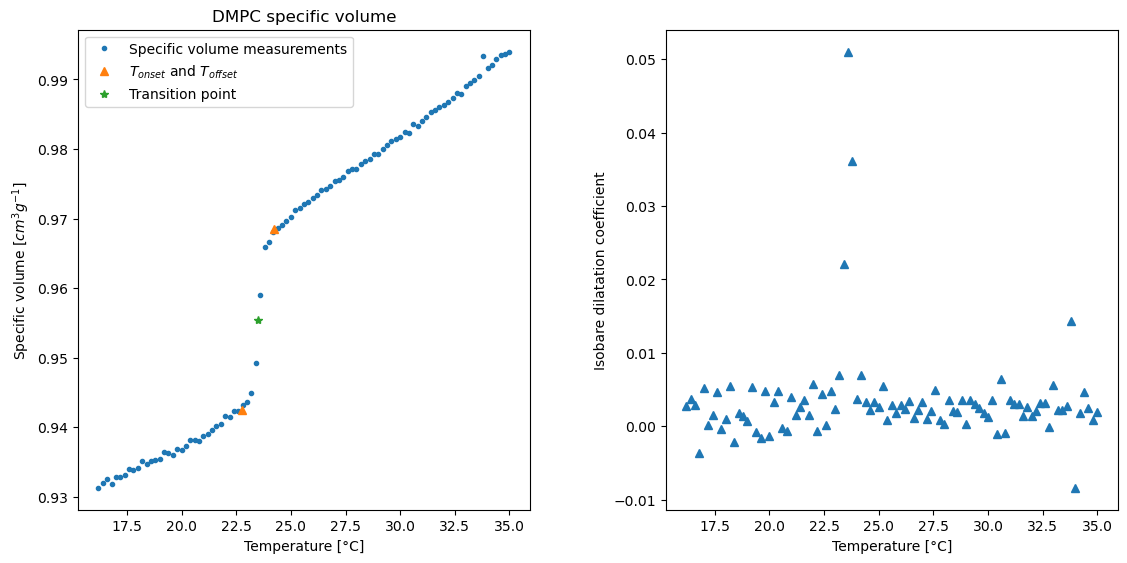

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6))

ax[0].plot(Temperature, Spec_vol,'.',label='Specific volume measurements')
#ax[0].plot(Temperature_down, Spec_down,'--',label='Linear regression of pre-transition points')
#ax[0].plot(Temperature_mid, Spec_mid,'--',label='Linear regression of transition points')
#ax[0].plot(Temperature_up, Spec_up,'--',label='Linear regression of post-transition points')
ax[0].plot([T_onset,T_offset],[v_onset,v_offset],'^',label='$T_{onset}$ and $T_{offset}$')
ax[0].plot(T_m,v_mean,'*',label='Transition point')
ax[0].legend()

ax[1].plot(Temperature,alpha,'^')

ax[0].set_xlabel('Temperature [°C]')
ax[1].set_xlabel('Temperature [°C]')
ax[0].set_ylabel('Specific volume [$cm^3g^{-1}$]')
ax[1].set_ylabel('Isobare dilatation coefficient')
ax[0].set_title('DMPC specific volume')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)